In [85]:
import numpy as np
import pandas as pd
n_samples = 300
q=5
de_linearize = lambda X: 5*X**2 - 2*X + 10
X = np.sort(np.random.rand(n_samples)) 
y = de_linearize(X) + np.random.randn(n_samples) * 0.1


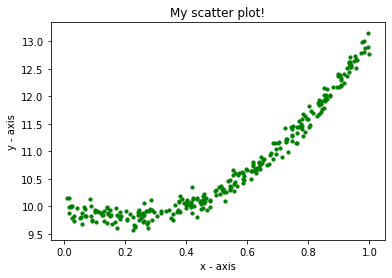

In [86]:
import matplotlib.pyplot as plt 
plt.scatter(X, y,color= "green", s=10) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.title('My scatter plot!')  
plt.show() 

In [87]:
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 

In [88]:
lin = LinearRegression() 
X=X.reshape(-1,1)
lin.fit(X,y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

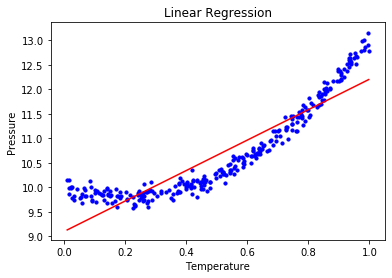

In [89]:
# Visualising the Linear Regression results 
plt.scatter(X, y, color = 'blue',s=10) 
  
plt.plot(X, lin.predict(X), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 
  
plt.show() 

In [90]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 

polyD1 = PolynomialFeatures(degree = 2) 
X_poly1 = polyD1.fit_transform(X) 
  
polyD1.fit(X_poly1, y) 
lin1 = LinearRegression() 
lin1.fit(X_poly1, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

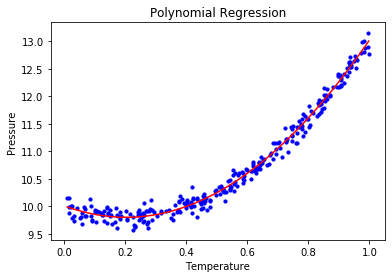

In [91]:
# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue',s=10) 
  
plt.plot(X, lin1.predict(polyD1.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 
plt.show() 

In [92]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 
  
polyD2 = PolynomialFeatures(degree = 200, include_bias=False) 
X_poly2 = polyD2.fit_transform(X) 
lin2 = LinearRegression() 
lin2.fit(X_poly2, y) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

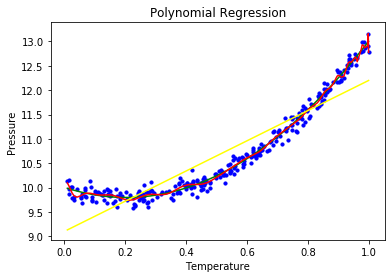

In [93]:
plt.plot(X, lin1.predict(polyD1.fit_transform(X)), color = 'green') 
plt.plot(X, lin2.predict(polyD2.fit_transform(X)), color = 'red')
plt.plot(X, lin.predict(X), color = 'yellow')  
plt.scatter(X, y, color = 'blue',s=10) 
plt.title('Polynomial Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 
  
plt.show() 

In [94]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

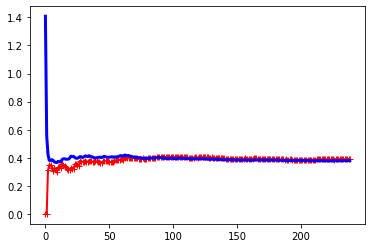

In [95]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

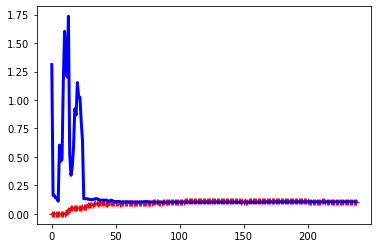

In [96]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)